# Статистический анализ данных  <a id = 'start'></a>

### Открытие и изучение данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [4]:
df_calls = pd.read_csv('calls.csv')
df_internet = pd.read_csv('internet.csv', index_col=0)
df_messages = pd.read_csv('messages.csv')
df_tariffs = pd.read_csv('tariffs.csv')
df_users = pd.read_csv('users.csv')

In [5]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [6]:
df_users.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,500.0,1249.500,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0
age,500.0,46.588,16.667630,18.0,32.00,46.0,62.00,75.0


In [7]:
df_calls['duration'] = np.ceil(df_calls['duration'])
display(df_calls.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


Округил продолжительность звонков . Пропусков не обнаружено .

In [8]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [9]:
df_internet.describe().T

,count,mean,std,min,25%,50%,75%,max
mb_used,149396.0,370.192426,278.300951,0.0,138.1875,348.015,559.5525,1724.83
user_id,149396.0,1252.099842,144.050823,1000.0,1130.0000,1251.000,1380.0000,1499.00


In [10]:
df_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


<div>
    <b>Мой комментарий:</b>
    <br> нужно изменить тип данных в session_date на datetime, пропусков в датафрейме нет,есть непонятный столбец unnamed: 0
    <br> надо понять что это и переименовать или удалить
</div>

In [11]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [12]:
df_messages.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,123036.0,1256.98941,143.523967,1000.0,1134.0,1271.0,1381.0,1499.0


In [13]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


<div>
    <b>Мой комментарий:</b>
    <br> нужно изменить тип данных в messsages_date на datetime, пропусков в датафрейме нет
</div>

In [14]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [15]:
df_users.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,500.0,1249.500,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0
age,500.0,46.588,16.667630,18.0,32.00,46.0,62.00,75.0


In [16]:
display(df_tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [17]:
df_tariffs = df_tariffs.rename(columns={'tariff_name':'tariff'})

<div>
    <b>Мой комментарий:</b>
    <br>Просто информация о двух тарифах 
    <br>Переименовал чтобы в будущем не было проблем со слиянием двух таблиц, т.к нужны детали тарифа для расчета помесячной выручки , чтобы столбец имел одинаковое название
</div>

In [18]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [22]:
df_users.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,500.0,1249.500,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0
age,500.0,46.588,16.667630,18.0,32.00,46.0,62.00,75.0


In [21]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<div>
    <b>Мой комментарий:</b>
    <br> нужно изменить тип данных в churn_date на datetime, пропуски в churn_datе значат что тариф еще действовал во время выгрузки данных
</div>

### Подготовка данных <a id='preparing'></a>

In [23]:
#приведем данные у к нужным типам
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])

<div>
    <b>Мой комментарий:</b>
    <br> изменил типы данных на необходимые
</div>

In [24]:
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month
table1 = df_calls.groupby(['user_id','month']).agg(total_calls = ('duration','count'), summary_minutes = ('duration','sum')).reset_index()

display(table1)

,user_id,month,total_calls,summary_minutes
0,1000,5,22,159.0
1,1000,6,43,172.0
2,1000,7,47,340.0
3,1000,8,52,408.0
4,1000,9,58,466.0
...,...,...,...,...
3169,1498,10,41,247.0
3170,1499,9,9,70.0
3171,1499,10,68,449.0
3172,1499,11,74,612.0


<div>
    <b>Мой комментарий:</b>
    <br>сгруппировал df_calls по user_id и month выделил в отдельный датафрейм, т.е нашел суммарное кол-во звонков , и потраченных минут пользователей помесячно
</div>

In [32]:
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month
table2 = df_messages.groupby(['user_id','month'])['id'].count().reset_index() 
table2 = table2.rename(columns={'id':'total_messages'})
display(table2)

,user_id,month,total_messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [34]:
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month
table3 = df_internet.groupby(['user_id','month'])['mb_used'].sum().reset_index()
table3 = table3.rename(columns={'mb_used':'total_mb_used'})
display(table3)

,user_id,month,total_mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


In [35]:
# лучше здесь сразу переведу мб в гб , а в методе подсчета выручки уже согласно тарифу пользователя округлю
table3['total_mb_used'] = table3['total_mb_used']/1024

In [36]:
# переименую столбец чтобы он соответсвтвовал данным
table3 = table3.rename(columns={'total_mb_used':'total_gb_used'})

<div>
    <b>Мой комментарий после ревью:</b>
    <br>Перевел мб трафика в гб , переименовал столбец , чтобы соответствовал данным
</div>

In [37]:
general_table = table1.merge(table2,on=['user_id','month'],how='outer')

In [38]:
general_table = general_table.merge(table3,on=['user_id','month'],how='outer')

In [39]:
general_table = general_table.merge(df_users[['tariff','user_id']],on='user_id')

In [40]:
#посмотрю сколько появилось пропусков после слияния outer join
display(general_table.isna().sum())

user_id              0
month                0
total_calls         40
summary_minutes     40
total_messages     497
total_gb_used       11
tariff               0
dtype: int64

In [44]:
general_table[general_table['total_messages'].isna()]

,user_id,month,total_calls,summary_minutes,total_messages,total_gb_used,tariff
8,1001,11,59.0,430.0,NaN,17.997402,smart
9,1001,12,63.0,414.0,NaN,13.707676,smart
42,1006,2,3.0,42.0,NaN,1.359521,smart
43,1006,3,46.0,286.0,NaN,16.882744,smart
44,1006,4,47.0,356.0,NaN,13.610059,smart
...,...,...,...,...,...,...,...
3143,1494,8,32.0,262.0,NaN,6.436279,smart
3144,1494,9,66.0,501.0,NaN,16.564951,smart
3145,1494,10,52.0,354.0,NaN,17.350820,smart
3146,1494,11,63.0,411.0,NaN,17.629346,smart


In [45]:
#заменю пропуски нулями потому что по тем данным месяца и user_id нет данных за сессии
general_table = general_table.fillna(0)

<div>
    <b>Мой комментарий:</b>
    <br>соеденил все нужные данные в одну большую таблицу методом merge по условию равенства user_id и month
</div>

In [46]:
general_table = general_table.merge(df_tariffs,on='tariff')

# соеденю к таблице df_users так как для проверки второй гипотезы нужен город
general_table = general_table.merge(df_users[['city','user_id']],on='user_id')
display(general_table)

,user_id,month,total_calls,summary_minutes,total_messages,total_gb_used,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,city
0,1000,5,22.0,159.0,22.0,2.200674,ultra,1000,30720,3000,1950,150,1,1,Краснодар
1,1000,6,43.0,172.0,60.0,22.689229,ultra,1000,30720,3000,1950,150,1,1,Краснодар
2,1000,7,47.0,340.0,75.0,13.675430,ultra,1000,30720,3000,1950,150,1,1,Краснодар
3,1000,8,52.0,408.0,81.0,13.726494,ultra,1000,30720,3000,1950,150,1,1,Краснодар
4,1000,9,58.0,466.0,57.0,14.227451,ultra,1000,30720,3000,1950,150,1,1,Краснодар
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,0.0,17.0,10.791562,smart,50,15360,500,550,200,3,3,Санкт-Петербург
3210,1489,9,0.0,0.0,32.0,16.803027,smart,50,15360,500,550,200,3,3,Санкт-Петербург
3211,1489,10,0.0,0.0,21.0,19.101016,smart,50,15360,500,550,200,3,3,Санкт-Петербург
3212,1489,11,0.0,0.0,20.0,17.081602,smart,50,15360,500,550,200,3,3,Санкт-Петербург


<div>
    <b> Мой комментарий: </b>
    <br> Посчитал для каждого пользователя : кол-во звонков и минут по месяцам, кол-во отправленных сообщений по месяцам,
   объем израсходованного трафика по месяцам
</div>

In [47]:
#округлю данные по по минутам разговора в большую сторону, так же данные по интернет трафику
general_table['total_gb_used'] = np.ceil(general_table['total_gb_used'])

In [48]:
def find_proceeds(row):
    
    tariff = row['tariff']
    summary_minutes = row['summary_minutes']
    total_gb_used = row['total_gb_used']
    total_messages = row['total_messages']
    
    minutes_included = row['minutes_included']
    gb_per_month_included = row['mb_per_month_included']/1024 # перевел в gb
    messages_included = row['messages_included']
    
    rub_per_minute = row['rub_per_minute']
    rub_per_gb = row['rub_per_gb'] 
    rub_per_message = row['rub_per_message']
    
    min_left = summary_minutes - minutes_included
    gb_left = total_gb_used - gb_per_month_included
    sms_left = total_messages - messages_included
    
    monthly_fee = row['rub_monthly_fee']
    
    
    if min_left > 0:
        price_for_min = min_left * rub_per_minute
    else:
        price_for_min = 0
        
    if gb_left > 0:
        price_for_gb = gb_left * rub_per_gb
    else:
        price_for_gb = 0
        
    if sms_left > 0:
        price_for_sms = sms_left * rub_per_message
    else:
        price_for_sms = 0
    
    return (monthly_fee + abs(price_for_min) + abs(price_for_gb) + abs(price_for_sms))


<div>
    <b>Мой комментарий:</b>
    <br>написал метод для расчета помесячной выручки от пользователя в зависимости от используемого тарифа 
</div>

In [49]:
general_table['proceed_for_month'] = general_table.apply(find_proceeds,axis=1)

<div>
    <b>Мой комментарий:</b>
    <br>Добавил в таблицу помесячную выручку с пользователя
</div>

### Анализ данных <a id='analysis'></a>

Найду среднее , дисперсию и стандартное отклонение по суммарным затратам трафика(интернет , звонки, сообщения) для каждого тарифа

In [56]:
print('Среднее количество минут по тарифам:')
round(general_table.groupby('tariff')['summary_minutes'].mean())

Среднее количество минут по тарифам:


tariff
smart    418.0
ultra    527.0
Name: summary_minutes, dtype: float64

In [55]:
print('Дисперсия и стандартное отклонение общего кол-ва минут по тарифам:')
round(general_table.groupby('tariff').agg(variance=('summary_minutes','var'), std=('summary_minutes','std')).reset_index())

Дисперсия и стандартное отклонение общего кол-ва минут по тарифам:


,tariff,variance,std
0,smart,36219.0,190.0
1,ultra,100874.0,318.0


<div>
    <b>Мой комментарий после ревью:</b>
    <br>Вывел и дисперсию и стандартное отклонение в одной таблице
</div>

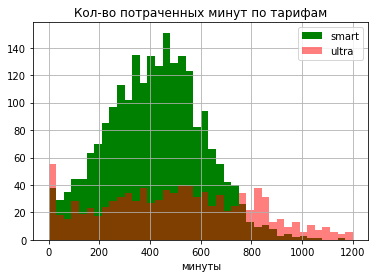

In [61]:
general_table[general_table['tariff'] == 'smart']['summary_minutes'].hist(bins=40,label='smart',range=(0,1200),color='green')
general_table[general_table['tariff'] == 'ultra']['summary_minutes'].hist(bins=40,label='ultra',alpha=0.5,range=(0,1200),color='red')
plt.title('Кол-во потраченных минут по тарифам')
plt.xlabel('минуты')
plt.legend(loc='upper right')

plt.show()

<div>
    <b>Мой комментарий:</b>
    <br>Пользователи тарифа смарт значительно больше тратят минут на разговоры (пик - около 400 минут)
    <br>также пользователи тарифа ультра тратят большее кол-во минут на разговоры до 1600 мин
</div>

In [63]:
#сделаю то же самое только для объема трафика
# среднее кол-во потраченного трафика для тарифа smart и ultra
print('Среднее количество потраченного трафика по тарифам, GB')
round(general_table.groupby('tariff')['total_gb_used'].mean())

Среднее количество потраченного трафика по тарифам, GB


tariff
smart    16.0
ultra    19.0
Name: total_gb_used, dtype: float64

In [65]:
#дисперсия и стандартное отклонение для каждого тарифа (потраченные минуты)
print('Дисперсия и стандартное отклонение общего кол-ва потраченного интернет трафика по тарифам:')
round(general_table.groupby('tariff').agg(variance=('total_gb_used', 'var'), std=('total_gb_used','std')).reset_index())

Дисперсия и стандартное отклонение общего кол-ва потраченного интернет трафика по тарифам:


,tariff,variance,std
0,smart,33.0,6.0
1,ultra,97.0,10.0


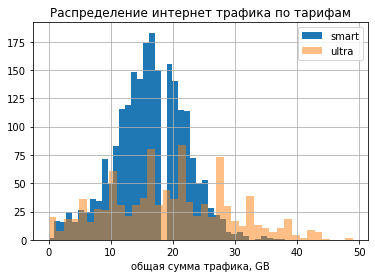

In [66]:
general_table[general_table['tariff'] == 'smart']['total_gb_used'].hist(bins=40,label='smart')
general_table[general_table['tariff'] == 'ultra']['total_gb_used'].hist(bins=40,label='ultra',alpha=0.5)
plt.title('Распределение интернет трафика по тарифам')
plt.xlabel('общая сумма трафика, GB')
          
plt.legend(loc='upper right')

plt.show()

<div>
    <b>Мой комментарий:</b>
    <br>также пользователи тарифа ультра тратят большее кол-во интернет трафика до 40 GB
</div>

In [68]:
# сделаю анализ для кол-ва сообщений по тарифам

#среднее кол-во сообщений по тарифам smart и ultra
print('Среднее количество потраченных сообщений по тарифам:')
round(general_table.groupby('tariff')['total_messages'].mean())

Среднее количество потраченных сообщений по тарифам:


tariff
smart    33.0
ultra    49.0
Name: total_messages, dtype: float64

In [70]:
#дисперсия и стандартное отклонение для каждого тарифа (потраченные минуты)
print('\nДисперсия и стандартное отклонение общего кол-ва потраченных сообщений по тарифам:')
round(general_table.groupby('tariff').agg(variance=('total_messages', 'var'), std=('total_messages','std')).reset_index())


Дисперсия и стандартное отклонение общего кол-ва потраченных сообщений по тарифам:


,tariff,variance,std
0,smart,797.0,28.0
1,ultra,2285.0,48.0


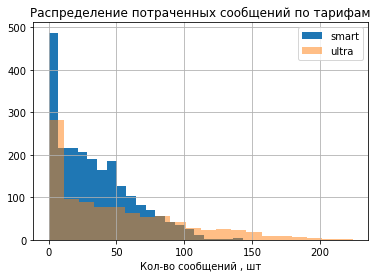

In [71]:
#построю гистограммы частот по общему кол-ву сообщений
general_table[general_table['tariff'] == 'smart']['total_messages'].hist(bins=20,label='smart')
general_table[general_table['tariff'] == 'ultra']['total_messages'].hist(bins=20,label='ultra',alpha=0.5)
plt.title('Распределение потраченных сообщений по тарифам')
plt.xlabel('Кол-во сообщений , шт')
plt.legend(loc='upper right')

plt.show()

<div>
    <b>Мой комментарий:</b>
    <br>также пользователи тарифа ультра тратят большее кол-во сообщений ежемесячно 
</div>

<div>
    <br>После изучения дисперсии и стандартных отклонений данных сессий по общему кол-ву потраченных минут , сообщений и трафика, можно сказать что пользователи тарифа ultra тратят больше трафика по всем данным, чем пользователи тарифа smart
    <br> т.е изменчивость данных пользователей тарифа ultra больше , чем smart 
</div>

### Проверка гипотез <a id='checking'></a>

Нулевая гипотеза - средняя выручка пользователей тарифов smart и ultra не различаются
<br>Альтернативная гипотеза звучик так: H1 - средняя выручка пользователей тарифов smart и ultra различаются

In [72]:
#сначала возьмем из данных две выборки по разным тарифам

sample_smart = general_table.query('tariff == "smart"')['proceed_for_month']
sample_ultra = general_table.query('tariff == "ultra"')['proceed_for_month']

In [73]:
# установим p-уровень значимость p = 0.05

results = st.ttest_ind(sample_smart, sample_ultra, equal_var=False)

In [74]:
print('p-уровень значимости: ', results.pvalue)
# p- уровень значимости очень близок к 0  значит нулевая гипотеза отбрасывается и средняя выручка пользователей тарифов smart и ultra различается

p-уровень значимости:  4.2606313931076085e-250


<div>
    <b>Мой комментарий:</b>
    <br>p-уровень значимости близок к 0, значит у нас есть основания отклонить нулевую гипотезу и принять альтернативную
    <br> т.е средняя выручка с пользователей тарифов smart и ultra - различается 
</div>

Нулевая гипотеза - средняя выручка пользователей из Москвы не отличается от выручки пользователей с других городов
<br>Альтернативная гипотеза звучик так: H1 - средняя выручка пользователей из Москвы отличается от других городов

In [75]:
#возьмем две выборки по городам Москва и Другие

sample_moscow = general_table.query('city == "Москва"')['proceed_for_month']
sample_other = general_table.query('city != "Москва"')['proceed_for_month']

In [76]:
# установим p-уровень значимость p = 0.05
results = st.ttest_ind(sample_moscow, sample_other, equal_var=False)

In [77]:
print('p-уровень значимости: ',results.pvalue)

p-уровень значимости:  0.5257376663729298


<div>
    <b>Мой комментарий:</b>
    <br>p-уровень значимости больше 0,05 значит у нас нет достаточно оснований чтобы отклонить нулевую гипотезу,
    <br> т.е выручка от пользователей с Москвы не отличается от выручки с пользователей с других городов
</div>

<div>
    <b>Мой комментарий:</b>
    <br>Были проверены две гипотезы и по их результатам можно сказать что 
    <br>Средняя выручка с пользователей тарифов smart и ultra различается
    <br>Средняя выручка с пользователей Москвы не отличается от выручки от пользователей других городов
</div>

### Вывод <a id='itog'></a>

<div>
    Были проведены исследования данных пользователей двух тарифов smart и ultra, были проверены две гипотезы о неравенстве средней выручки в зависимости от тарифа и от расположения абонента, по результатам аналитики можно сказать , что средняя выручка с пользователей разных тарифов различается, средняя выручка с пользователей с города Москвы не отличается от средней выручки от абонентов с других регионов
    <br>По данным исследования сессий пользователей по звонкам , сообщениям и интернет трафику, можно сделать вывод, что   
    для оператора более выгодный тариф это ultra
</div>